In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import random
import scipy.stats as stats

# **Teste de Hipótese (teste estatístico)**

O teste de hipóteses é uma metodologia estatística que nos auxilia na tomada de decisões sobre uma ou mais populações baseada na informação obtida na amostra. Ela nos permite verificar se dados amostrais trazem evidências que apoiem ou não uma hipótese estatística formulada. Muitas vezes cientistas de dados precisam fazer testes para confirmar se uma determinada hipótese é verdadeira. Hipóteses são afirmações como "Cientistas preferem ambiente cloud do que On Premisse" ou "É mais provável que as pessoas reprovem o data master antes de serem aprovadas". O esquema clássico contém:

- **hipótese nula (H0):** Ela afirma que o parâmetro populacional assume um certo valor ou premissa.
- **hipótese alernativa (H1):** Ela afirma que o parâmetro populacional assume valores diferentes do valor descrito por H0.

Em todo processo decisório, em que temos que escolher dois cursos de ação, sempre podemos cometer erros. O mesmo acontece em um teste de hipóteses. Basicamente dois tipos de erros podem ocorrer:

- **Erro tipo I:** Quando rejeitamos a hipótese nula, porém, ela é verdadeira.
- **Erro tipo II:** Quando não rejeitamos a hipótese nula, porém, ela é falsa.

# **VALOR CRÍTICO**
Um valor crítico é um ponto sobre a distribuição da estatística de teste sob a hipótese nula, que define um conjunto de valores para rejeitar a hipótese nula. Esse conjunto é chamado de região crítica ou de rejeição. Normalmente, os testes unilaterais têm um valor crítico, e os testes bilaterais têm dois valores críticos.

<img src='https://tse2.mm.bing.net/th?id=OIP.7znhtKEPxtasmxyatyLeegHaE5&pid=Api&P=0&h=180'>

# **Tipos de teste de hipótese**
**Teste t:** Usado para comparação de duas amostras com distribuição próxima a gaussiana e desvio padrão agrupados.

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/f315cf5bf20ef031c0d7ec1d65fc075b4789b096'>


# **Valor-p**
uma das variantes mais importantes do teste de hipóteses, o valor de p.
Não importa o teste estatístico que se faça, sempre se reporta o valor de p para dizer se houve ou não efeitos significativos.

Os programas estatísticos usualmente fornecem diretamente o valor de p quando realizamos testes de hipóteses. O valor p é a probabilidade de uma métrica de um teste estatístico qualquer ser maior que o valor observado, assumindo que a H0 é verdadeira.


# **Passo a passo do teste de hipóteses**

1. Defina hipóteses nulas e alternativas

2. Navegar nos dados, verificar suposições

3. Calcular estatística de teste

4. Determine o valor p correspondente

5. Tome uma decisão sobre a hipótese nula.






In [2]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/Kavitha-Kothandaraman/Advanced-Statistics-Hypothesis-Analysis/master/insurance.csv')
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Neste caso de estudo investigaremos a relação de mulheres e homens adultos (18 a 50 anos) com o bmi(body mass index). Suspeitamos que os homens adultos têm um índice de massa corporal significamente maior que o das mulheres.

**Passo 1:** Definir hipóteses
- H0 = Há diferença significativa no bmi médio de mulheres e homens adultos
- H1 = Não há diferença significativa no bmi médio de mulheres e homens adultos

In [3]:
alpha = 0.05 # nível de significância

**Passo 2:** Examine os dados e verifique as suposições

Nesta etapa, os dados serão filtrados para incluir apenas adultos que estão entre 18 e 50 anos. Depois disso, precisamos fazer alguns cálculos estatísticos como a média, o mínimo, o máximo, o desvio padrão e o tamanho da amostra para homens e mulheres.

Algumas das suposições que devemos verificar são as seguintes:

1. As amostras são consideradas amostras aleatórias simples
2. As amostras são independentes umas das outras
3. Ambas as populações de resposta são aproximadamente normais ou os tamanhos das amostras são grandes o suficiente.

In [4]:
adultos = raw_data[(raw_data['age']>=18) & (raw_data['age']<=50)] # filtrando idade
adultos = adultos[['sex', 'bmi']] # selecionando vaiáveis de interesse

adultos.shape

(982, 2)

As suposições 1 e 2 são perceptiveis de forma imediata. Assim, partindo para a suposição 3, temos:

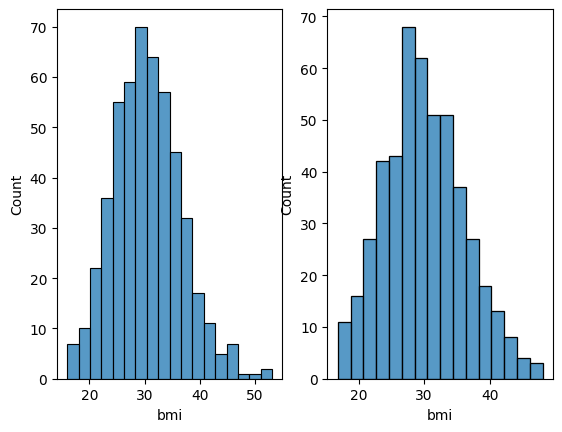

In [5]:
# verificando se tamnho das amostras são grandes o suficiente
adultos.sex.value_counts()

# verificando se ambas as populações são aproximadamente normais
fig, ax = plt.subplots(1, 2)
sns.histplot(data=adultos[adultos['sex']== 'male'], x='bmi', ax=ax[0])
sns.histplot(data=adultos[adultos['sex']== 'female'], x='bmi', ax=ax[1])
plt.show()

Para nossa grata surpresa, os elementos de estudo têm o comportamento próximo de uma distribuição gaussiana.

In [6]:
homem = adultos[adultos['sex']=='male']
bmi_h = homem.bmi.mean()
n_h = len(homem)
desvio_h = np.std(homem.bmi)
print(f'média bmi homem: {bmi_h:.2f}\nnúmero de amostras: {n_h}')

mulher = adultos[adultos['sex']=='female']
bmi_m = mulher.bmi.mean()
n_m = len(mulher)
desvio_m = np.std(mulher.bmi)
print(f'\n\nmédia bmi mulher: {bmi_m:.2f}\nnúmero de amostras: {n_m}')

média bmi homem: 30.53
número de amostras: 501


média bmi mulher: 30.04
número de amostras: 481


**Passo 3:** Calcular estatística de teste

A estatística de teste é uma medida de quão longe nossa estatística de amostra está de nosso parâmetro de população hipotético, em termos de erros padrão estimados. Agora devemos verificar qual o teste melhor associado ao problema.

No caso deste estudo temos:
1. duas amostras independentes
2. as duas populações mostram distribuições normais
3. desvio padrão igual assumido

Portanto, faremos um teste t de duas amostras:


In [7]:
std = adultos.bmi.std() # desvio padrão agrupado

dF = n_h + n_m - 2 # graus de liberdade
alpha = 0.05 # nível de significância (95%)

t = (bmi_h - bmi_m) / (math.sqrt((desvio_h**2/n_h) + (desvio_m**2/n_m)))

print(f'teste estatístico t: {t}')

teste estatístico t: 1.267905771851873


**Passo 4:** Determine o valor p correspondente

Não importa o teste estatístico que se faça, sempre se reporta o valor de p para dizer se houve ou não efeitos significativos.


In [9]:
p_valor = 2 * (1 - stats.t.cdf(abs(t), df=dF))
print(f'valor p:{p_valor:.3f}')

valor p:0.205


**Passo 5:** Tomar decisão sobre a hipótese nula

Para tomar a decisão, precisamos avaliar o valor-p. temos duas possibilidades de decisão:

1. **Rejeitar hipótese nula:** Quando o valor-p é maior que alpha

2. **Aceitar hipótese nula:** Quando o valor-p é menor que alpha

In [10]:
if p_valor > alpha:
  print('decisão: Rejeitar hipótese nula')
else:
  print('decisão: Aceitar hipótese nula')

decisão: Rejeitar hipótese nula


Portanto podemos afirmar de maneira confiável de que não há diferença significativa entre o bmi de homens e mulheres na faixa de 18 a 50 anos no nosso estudo.